In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the dataset
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/city_day.csv')
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [2]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
# prompt: set date as index

import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# prompt: show count missing value each column
print(df.isnull().sum())

City              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [5]:
# prompt: impute missing value on PM2.5,PM10 ,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene, Toluene, Xylene and AQI

# Fill missing values with the mean for each column
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10'] = df['PM10'].fillna(df['PM10'].mean())
df['NO'] = df['NO'].fillna(df['NO'].mean())
df['NO2'] = df['NO2'].fillna(df['NO2'].mean())
df['NOx'] = df['NOx'].fillna(df['NOx'].mean())
df['NH3'] = df['NH3'].fillna(df['NH3'].mean())
df['CO'] = df['CO'].fillna(df['CO'].mean())
df['SO2'] = df['SO2'].fillna(df['SO2'].mean())
df['O3'] = df['O3'].fillna(df['O3'].mean())
df['Benzene'] = df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene'] = df['Toluene'].fillna(df['Toluene'].mean())
df['Xylene'] = df['Xylene'].fillna(df['Xylene'].mean())
df['AQI'] = df['AQI'].fillna(df['AQI'].mean())

print(df.isnull().sum())

City             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


In [6]:
# prompt: create new  AQI column with name AQI_CAT based on AQI  column . If AQI value more than 100 put 1 and if not 0

import numpy as np
df['AQI_CAT'] = np.where(df['AQI'] > 100, 1, 0)
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_CAT
Date,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,NaN,1
2015-01-02,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,NaN,1
2015-01-03,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,NaN,1
2015-01-04,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,NaN,1
2015-01-05,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,NaN,1


In [7]:
# prompt: drop AQI_Bucket

if 'AQI_Bucket' in df.columns:
  df = df.drop('AQI_Bucket', axis=1)

df.head()


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_CAT
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,1
2015-01-02,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,1
2015-01-03,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,1
2015-01-04,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,1
2015-01-05,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,1


In [8]:
# prompt: check how many 0 and 1 in AQI_CAT

print(df['AQI_CAT'].value_counts())


AQI_CAT
1    19966
0     9565
Name: count, dtype: int64


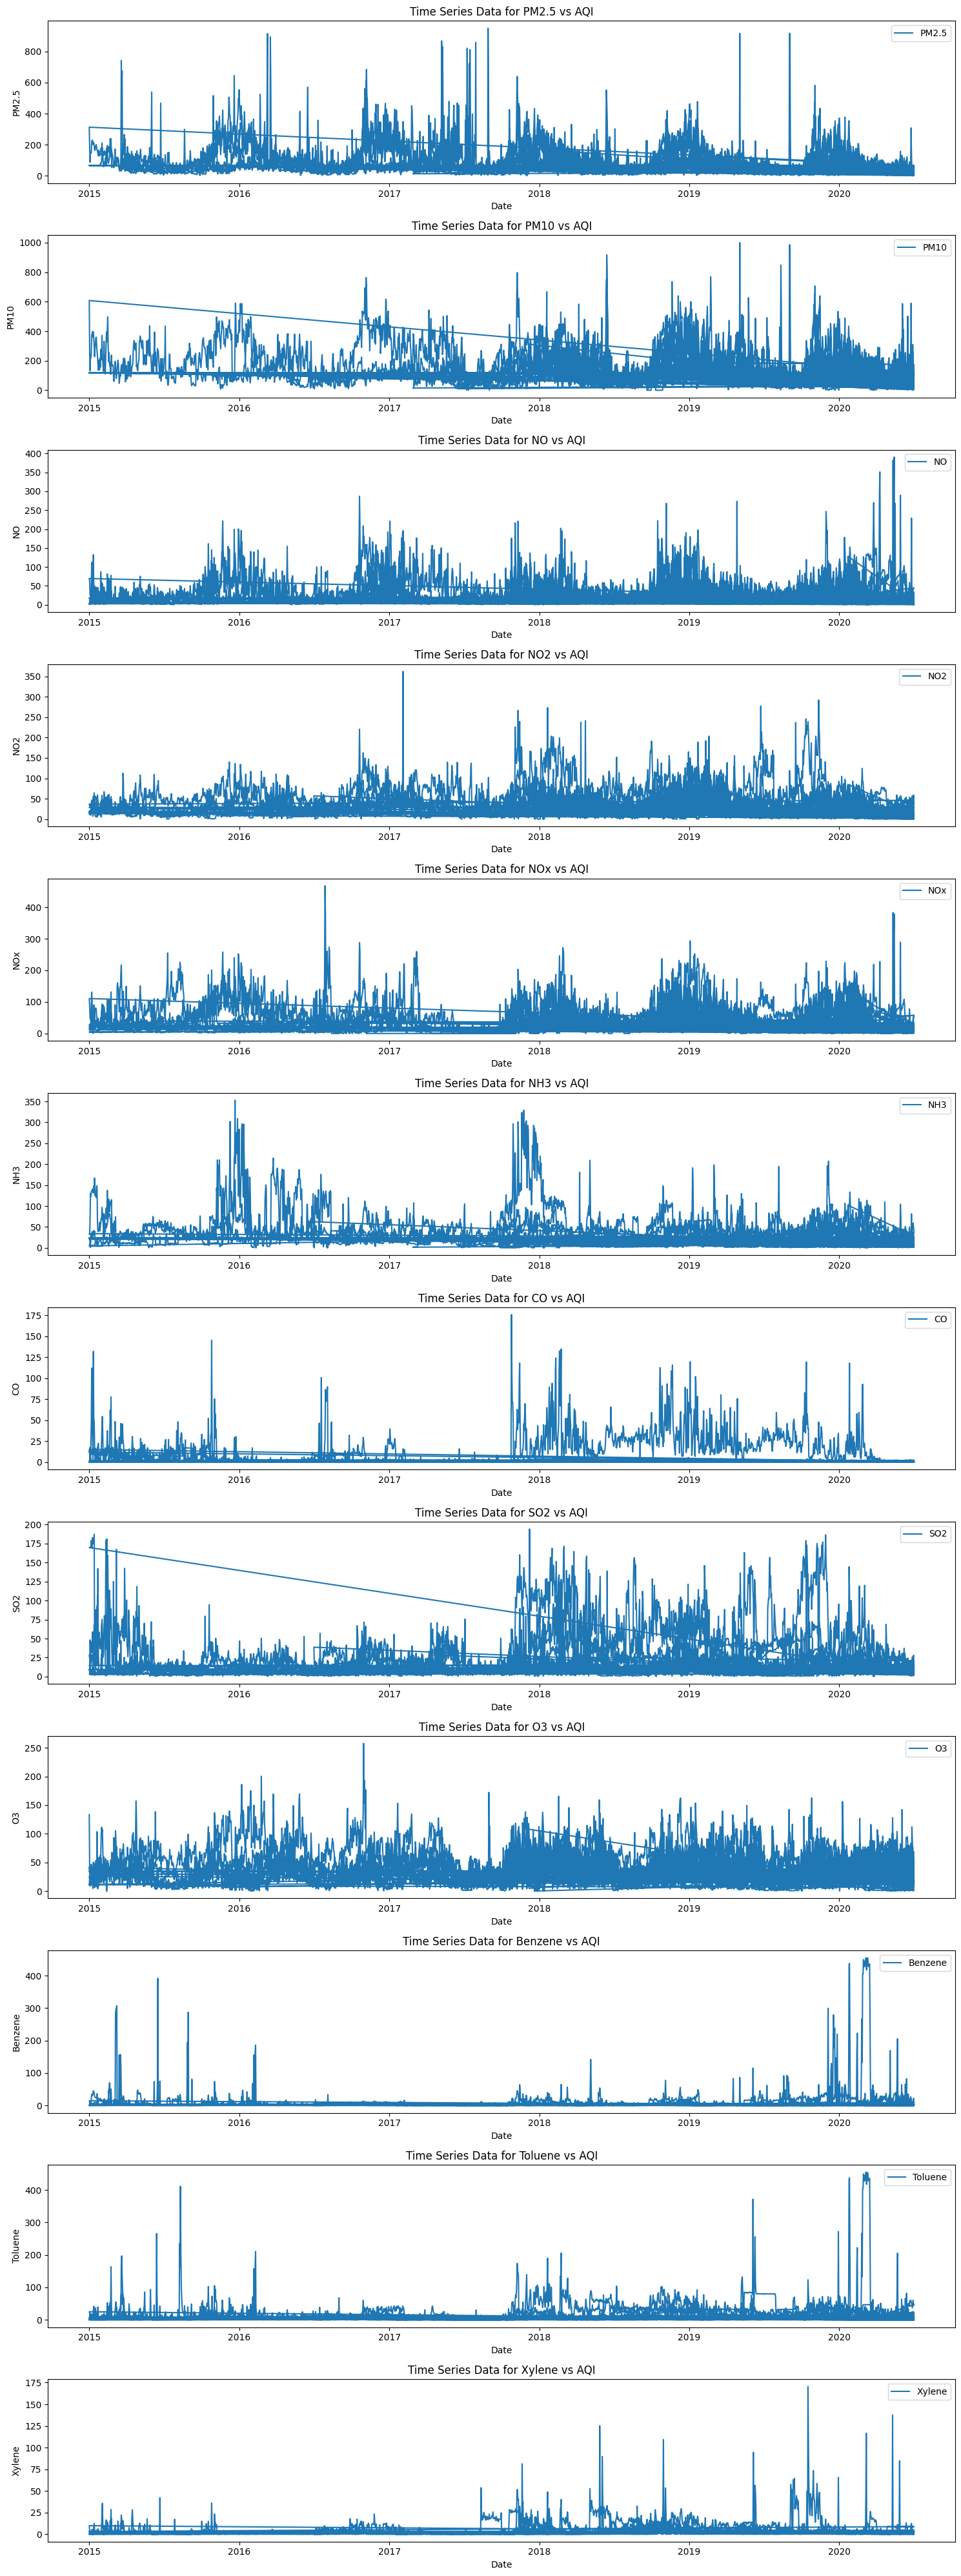

In [9]:
# prompt:  prompt: genarate graph time series Data vs AQI 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',

import matplotlib.pyplot as plt

# Select the columns you want to plot
columns_to_plot = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create a figure and axes
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(15, 40))

# Loop through the columns and plot the data
for i, column in enumerate(columns_to_plot):
  axes[i].plot(df.index, df[column], label=column)
  axes[i].set_title(f"Time Series Data for {column} vs AQI")
  axes[i].set_xlabel("Date")
  axes[i].set_ylabel(column)
  axes[i].legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

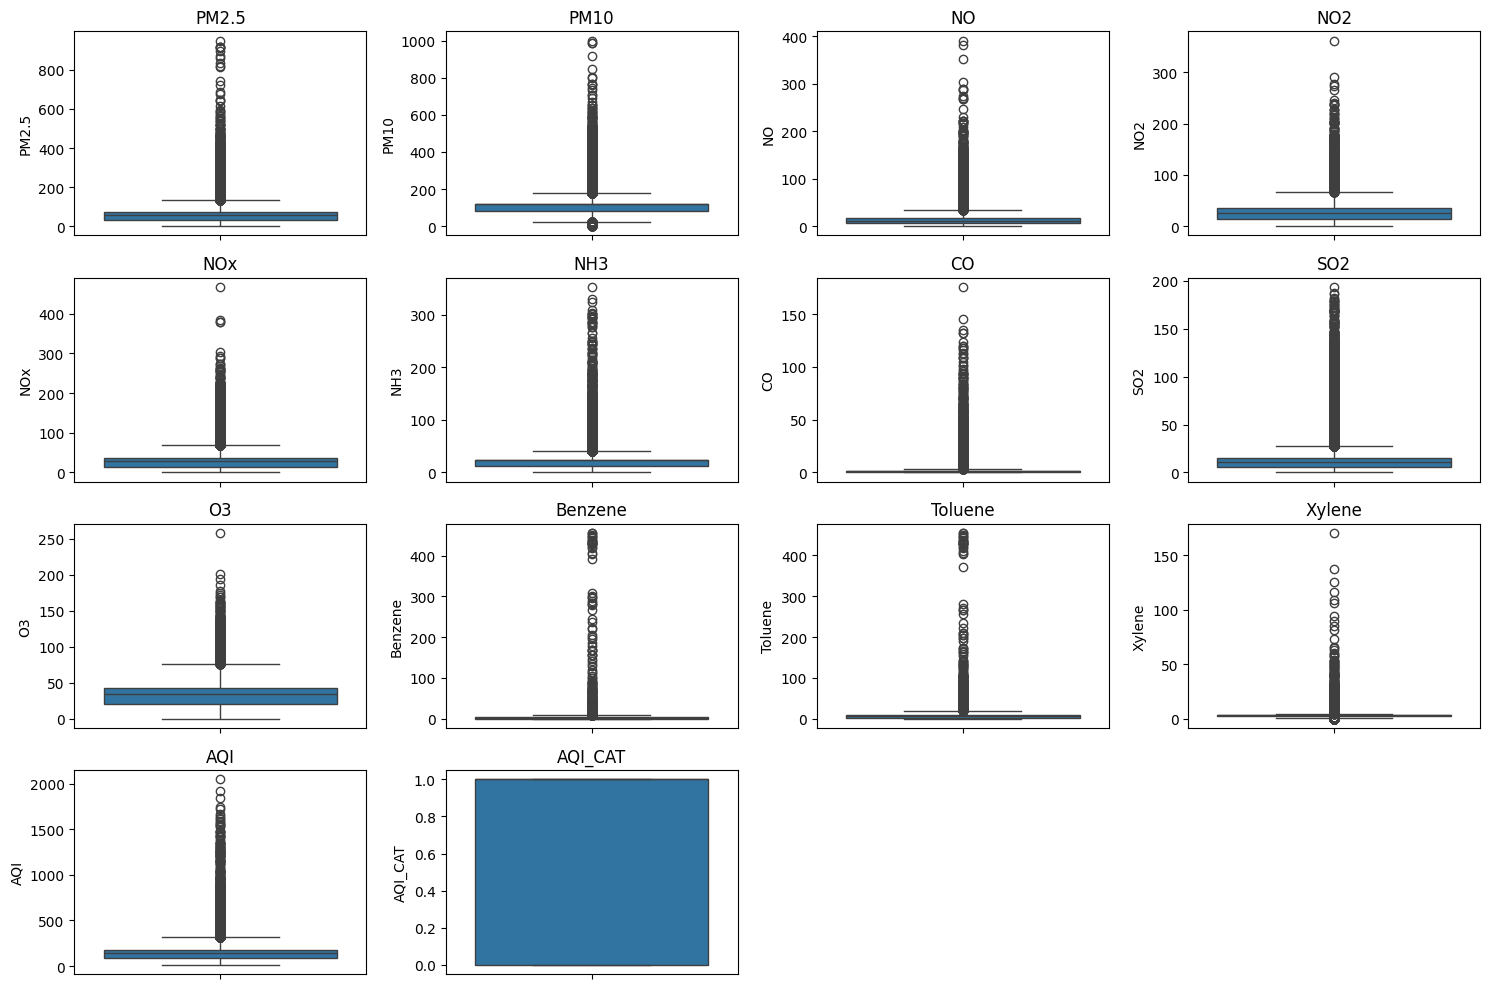

In [10]:
# prompt: plot graph eda like box plot or bar chart all distribution or plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: solve outlier  'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', AQI

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a function to handle outliers using IQR
def handle_outliers_iqr(df, columns):
  for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df

# List of columns with potential outliers
columns_to_handle = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Handle outliers using IQR method
df = handle_outliers_iqr(df, columns_to_handle)



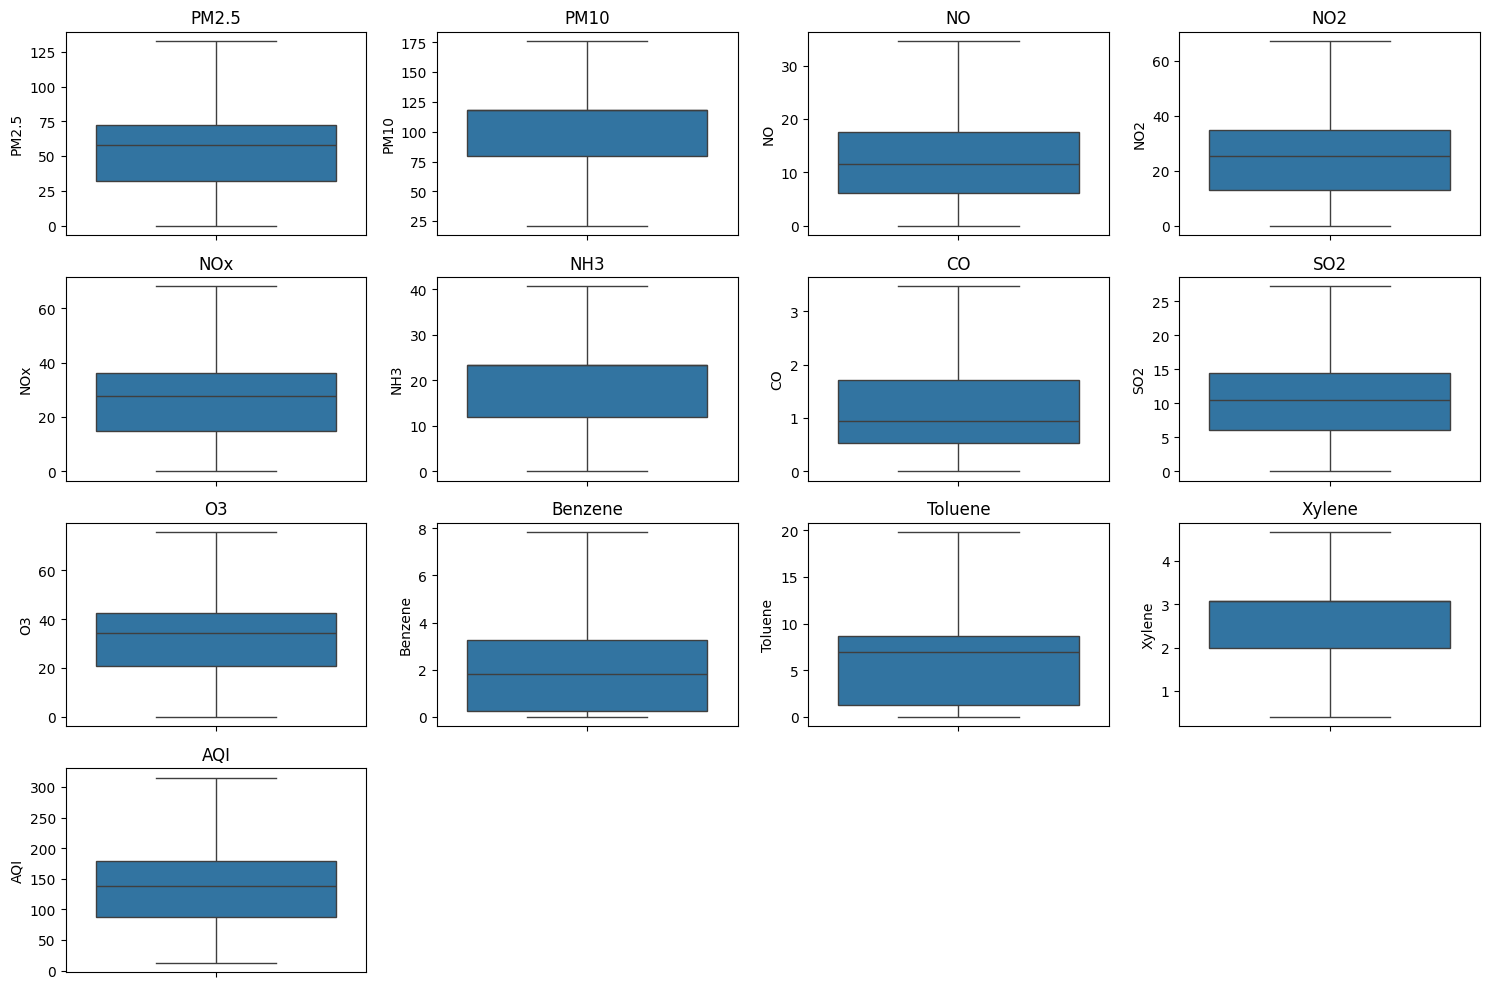

In [ ]:
# prompt: plot back boxplot  'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', AQI

import matplotlib.pyplot as plt
# Box plots for numerical features after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# Extract month, year, and day from the 'Date' index
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day'] = df.index.day
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_CAT,Month,Year,Day
Date,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.920,27.194943,75.715,0.00,0.02,0.394808,166.463581,1,1,2015,1
2015-01-02,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.970,24.550000,34.060,3.68,5.50,3.770000,166.463581,1,1,2015,2
2015-01-03,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,3.465,27.194943,30.700,6.80,16.40,2.250000,166.463581,1,1,2015,3
2015-01-04,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.700,18.590000,36.080,4.43,10.14,1.000000,166.463581,1,1,2015,4
2015-01-05,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,3.465,27.194943,39.310,7.01,18.89,2.780000,166.463581,1,1,2015,5


AQI_CAT                0     1
City                          
Ahmedabad             44  1965
Aizawl               111     2
Amaravati            567   384
Amritsar             557   664
Bengaluru           1239   770
Bhopal                78   211
Brajrajnagar         136   802
Chandigarh           202   102
Chennai              953  1056
Coimbatore           331    55
Delhi                179  1830
Ernakulam            104    58
Gurugram             246  1433
Guwahati             251   251
Hyderabad            851  1155
Jaipur               321   793
Jorapokhar           147  1022
Kochi                 82    80
Kolkata              404   410
Lucknow              380  1629
Mumbai               454  1555
Patna                171  1687
Shillong             195   115
Talcher              169   756
Thiruvananthapuram   894   218
Visakhapatnam        499   963


<Figure size 1500x600 with 0 Axes>

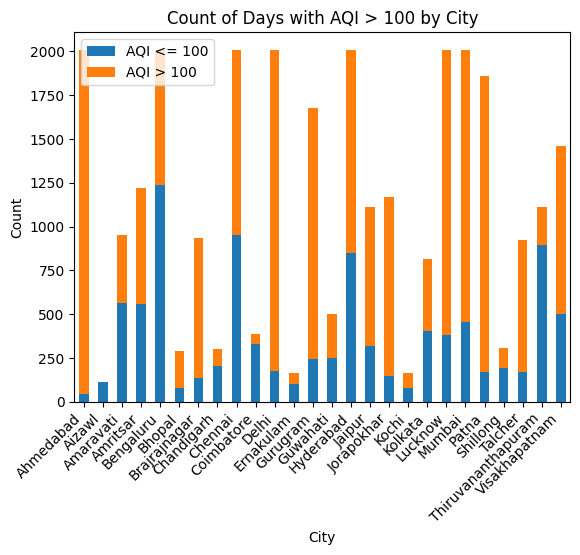

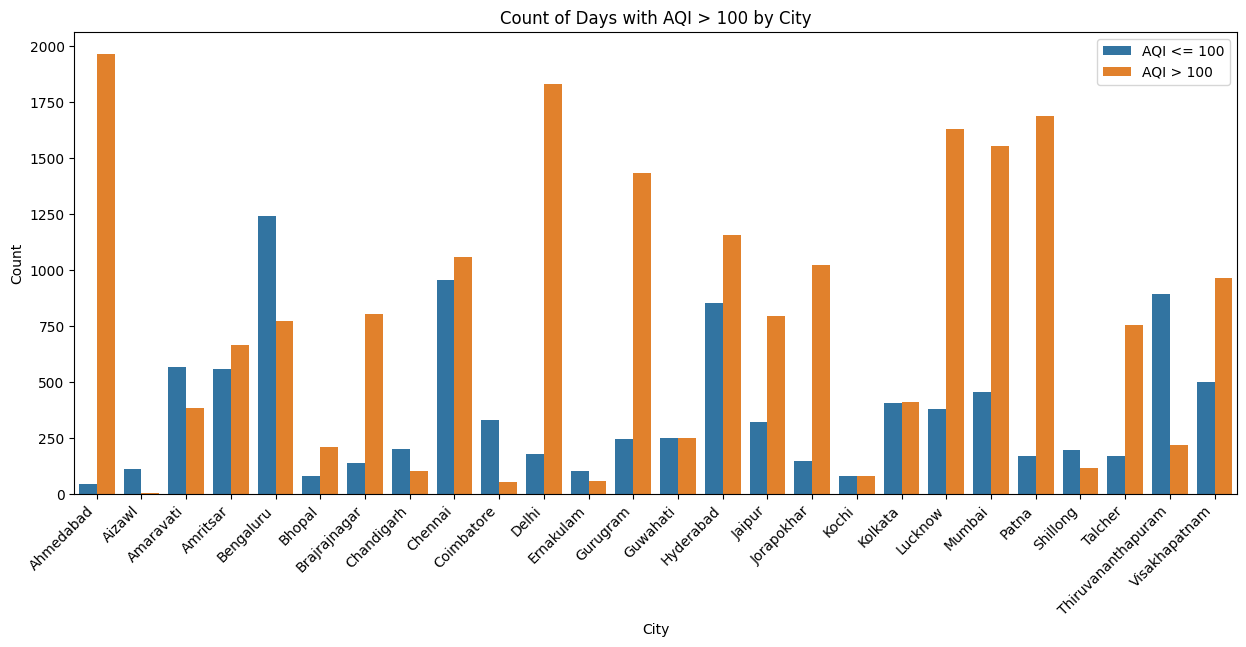

In [ ]:
# prompt: show count each city or graph of AQI_CAT

import matplotlib.pyplot as plt
import seaborn as sns

# Group by city and count the number of days with AQI_CAT = 1 (AQI > 100)
city_aqi_counts = df.groupby(['City', 'AQI_CAT'])['AQI_CAT'].count().unstack()

# Print the counts
print(city_aqi_counts)

# Plot the counts using a bar chart
plt.figure(figsize=(15, 6))
city_aqi_counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Days with AQI > 100 by City')
plt.xticks(rotation=45, ha='right')
plt.legend(['AQI <= 100', 'AQI > 100'])
plt.show()

# Alternatively, you can use a countplot from seaborn
plt.figure(figsize=(15, 6))
sns.countplot(x='City', hue='AQI_CAT', data=df)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Days with AQI > 100 by City')
plt.xticks(rotation=45, ha='right')
plt.legend(['AQI <= 100', 'AQI > 100'])
plt.show()


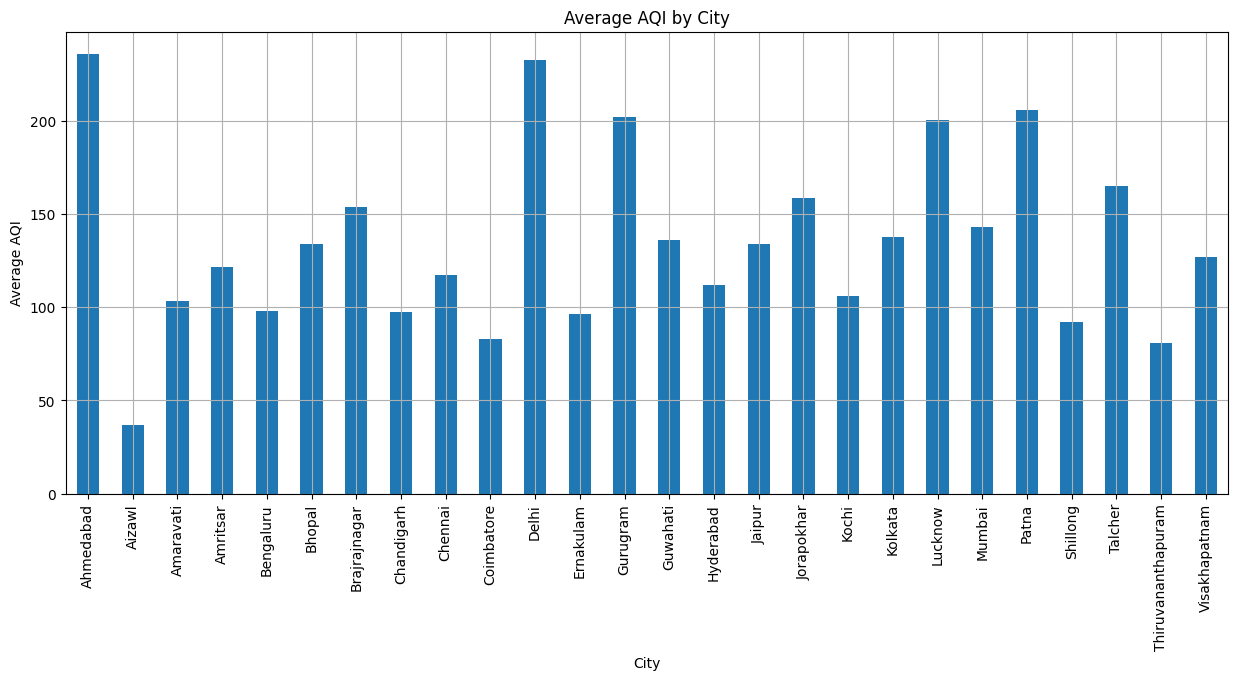

In [ ]:
# prompt: plot bar graph city vs AQI

import matplotlib.pyplot as plt

# Group data by city and calculate the mean AQI
city_aqi = df.groupby('City')['AQI'].mean()

# Create a bar plot
plt.figure(figsize=(15, 6))
city_aqi.plot(kind='bar')
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

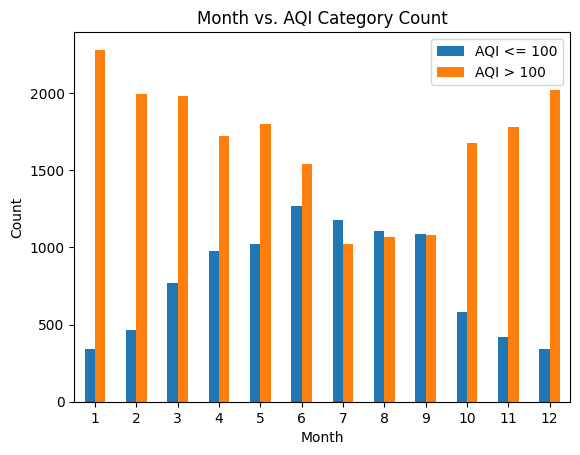

In [ ]:
# prompt: plot month vs AQI_CAT in bar chart

import matplotlib.pyplot as plt
# Group data by month and calculate the count of AQI_CAT (0 or 1)
month_aqi_counts = df.groupby(['Month', 'AQI_CAT'])['AQI_CAT'].count().unstack()

# Create a bar chart
plt.figure(figsize=(12, 6))
month_aqi_counts.plot(kind='bar')
plt.title('Month vs. AQI Category Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['AQI <= 100', 'AQI > 100'])
plt.show()


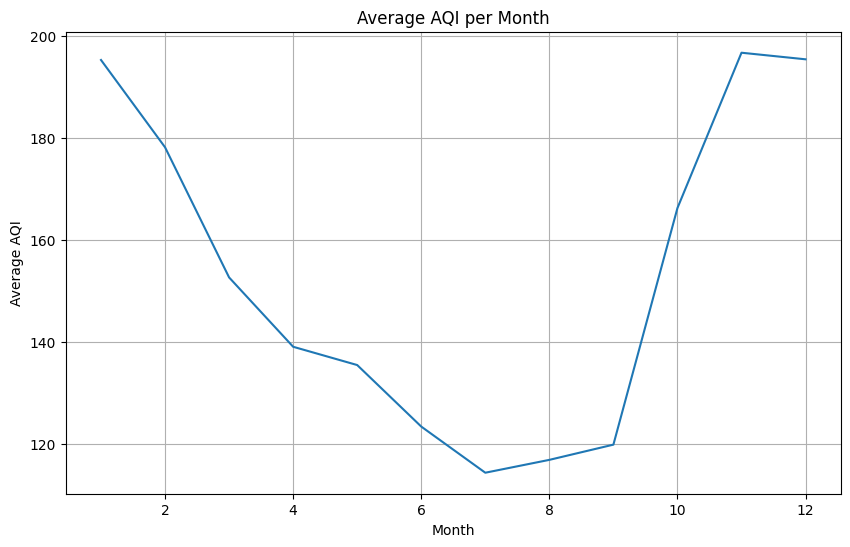

In [ ]:
# prompt: plot month vs AQI

import matplotlib.pyplot as plt
# Group data by month and calculate the average AQI for each month
monthly_aqi = df.groupby('Month')['AQI'].mean()

# Plot the monthly average AQI
plt.figure(figsize=(10, 6))
plt.plot(monthly_aqi.index, monthly_aqi.values)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average AQI per Month')
plt.grid(True)
plt.show()


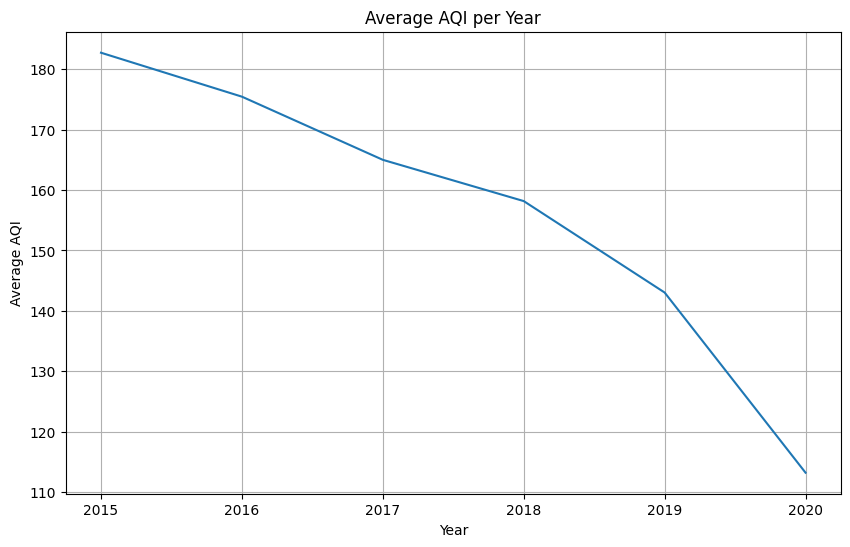

In [ ]:
# prompt: check year vs aqi

import matplotlib.pyplot as plt
# Group data by year and calculate the average AQI for each year
yearly_aqi = df.groupby('Year')['AQI'].mean()

# Plot the yearly average AQI
plt.figure(figsize=(10, 6))
plt.plot(yearly_aqi.index, yearly_aqi.values)
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Average AQI per Year')
plt.grid(True)
plt.show()


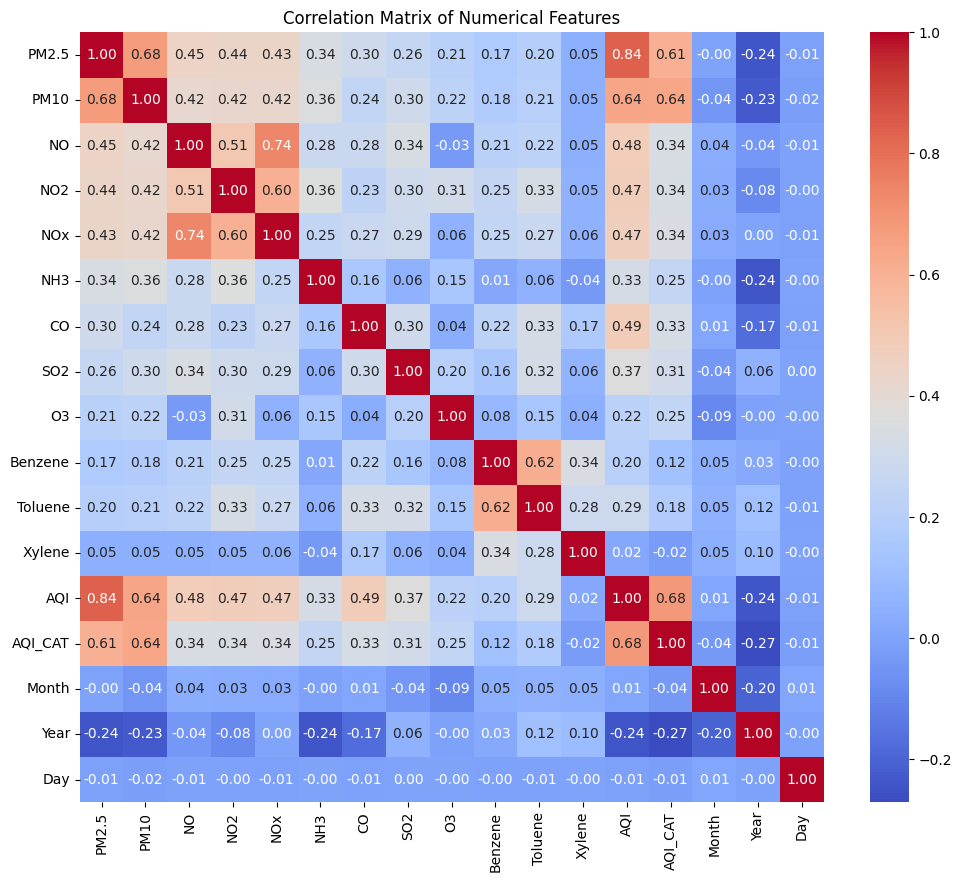

In [ ]:
# prompt: correlation graph for numerical

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# Normalize date-related features
df['Month'] = df['Month'] / 12
df['Year'] = df['Year'] / df['Year'].max()
df['Day'] = df['Day'] / 31

In [ ]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_CAT,Month,Year,Day
Date,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.920,27.194943,75.715,0.00,0.02,0.394808,166.463581,1,0.083333,0.997525,0.032258
2015-01-02,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.970,24.550000,34.060,3.68,5.50,3.770000,166.463581,1,0.083333,0.997525,0.064516
2015-01-03,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,3.465,27.194943,30.700,6.80,16.40,2.250000,166.463581,1,0.083333,0.997525,0.096774
2015-01-04,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.700,18.590000,36.080,4.43,10.14,1.000000,166.463581,1,0.083333,0.997525,0.129032
2015-01-05,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,3.465,27.194943,39.310,7.01,18.89,2.780000,166.463581,1,0.083333,0.997525,0.161290


In [ ]:
# prompt: check skewness all column numerica

import pandas as pd
import numpy as np
numerical_features = df.select_dtypes(include=np.number).columns
skewness_df = pd.DataFrame(df[numerical_features].skew(), columns=['Skewness'])
print(skewness_df)


         Skewness
PM2.5    0.687203
PM10    -0.246634
NO       0.771670
NO2      0.839220
NOx      0.652213
NH3      0.142119
CO       0.957087
SO2      0.785712
O3       0.558004
Benzene  0.991343
Toluene  0.830528
Xylene  -0.664483
AQI      0.757226
AQI_CAT -0.752678
Month    0.121956
Year    -0.376608
Day     -0.000672


In [ ]:
import pandas as pd

# One-hot encode the 'City' column
df = pd.get_dummies(df, columns=['City'], prefix=['City'])

# Convert one-hot encoded columns to integers
for col in df.columns:
    if col.startswith('City_'):
        df[col] = df[col].astype(int)

# Display the modified DataFrame
df.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.920,27.194943,75.715,0.00,...,0,0,0,0,0,0,0,0,0,0
2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.970,24.550000,34.060,3.68,...,0,0,0,0,0,0,0,0,0,0
2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,3.465,27.194943,30.700,6.80,...,0,0,0,0,0,0,0,0,0,0
2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.700,18.590000,36.080,4.43,...,0,0,0,0,0,0,0,0,0,0
2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,3.465,27.194943,39.310,7.01,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: normalize all except AQI_CAT and all city

# Create a list of columns to normalize
cols_to_normalize = [col for col in df.columns if not col.startswith('City_') and col != 'AQI_CAT']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Display the modified DataFrame
df.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.507381,0.625,0.026010,0.271053,0.252085,0.577614,0.265512,1.000000,1.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2015-01-02,0.507381,0.625,0.027455,0.233394,0.241943,0.577614,0.279942,0.902706,0.449772,0.469262,...,0,0,0,0,0,0,0,0,0,0
2015-01-03,0.507381,0.625,0.502286,0.287128,0.436556,0.577614,1.000000,1.000000,0.405389,0.867115,...,0,0,0,0,0,0,0,0,0,0
2015-01-04,0.507381,0.625,0.048552,0.274923,0.264138,0.577614,0.490620,0.683467,0.476455,0.564900,...,0,0,0,0,0,0,0,0,0,0
2015-01-05,0.507381,0.625,0.638117,0.318684,0.555029,0.577614,1.000000,1.000000,0.519120,0.893893,...,0,0,0,0,0,0,0,0,0,0


#Data preparation

In [ ]:

import numpy as np
# Define the number of time steps to consider for prediction
time_steps = 10

# Create empty lists to store the input sequences and target values
X, y = [], []

# Iterate through the DataFrame, creating input sequences and target values
for i in range(time_steps, len(df)): # Changed n_steps to time_steps
    X.append(df.iloc[i - time_steps:i, :].values)  # Input sequence of n_steps
    y.append(df['AQI_CAT'].iloc[i])  # Target value (AQI_CAT) at the current time step

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (23616, 10, 43)
y_train shape: (23616,)
X_test shape: (5905, 10, 43)
y_test shape: (5905,)


#SimpleRNN

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score
import numpy as np

# Create the SimpleRNN model with dropout and regularization for binary classification
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Convert probabilities to binary outcomes
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Model evaluation (Calculate metrics)
train_accuracy = accuracy_score(y_train, train_predict_binary)
test_accuracy = accuracy_score(y_test, test_predict_binary)
train_precision = precision_score(y_train, train_predict_binary)
test_precision = precision_score(y_test, test_predict_binary)
train_f1 = f1_score(y_train, train_predict_binary)
test_f1 = f1_score(y_test, test_predict_binary)
train_auc = roc_auc_score(y_train, train_predict)
test_auc = roc_auc_score(y_test, test_predict)
train_conf_matrix = confusion_matrix(y_train, train_predict_binary)
test_conf_matrix = confusion_matrix(y_test, test_predict_binary)

# Print the results
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print('Train Precision:', train_precision)
print('Test Precision:', test_precision)
print('Train F1 Score:', train_f1)
print('Test F1 Score:', test_f1)
print('Train AUC:', train_auc)
print('Test AUC:', test_auc)
print('Train Confusion Matrix:\n', train_conf_matrix)
print('Test Confusion Matrix:\n', test_conf_matrix)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8101 - loss: 1.3305 - val_accuracy: 0.9179 - val_loss: 0.3792
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8768 - loss: 0.4297 - val_accuracy: 0.9327 - val_loss: 0.2530
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8764 - loss: 0.3512 - val_accuracy: 0.9217 - val_loss: 0.2414
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8774 - loss: 0.3385 - val_accuracy: 0.9365 - val_loss: 0.2346
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8847 - loss: 0.3200 - val_accuracy: 0.9229 - val_loss: 0.2285
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8847 - loss: 0.3174 - val_accuracy: 0.9287 - val_loss: 0.2370
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8854 - loss: 0.3119 - val_accuracy: 0.9367 - val_loss: 0.2408
Epoch 8/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8893 - loss: 0.3040 - val_accuracy: 

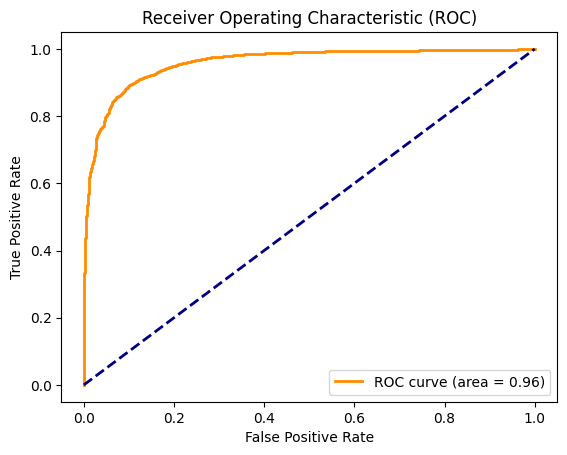

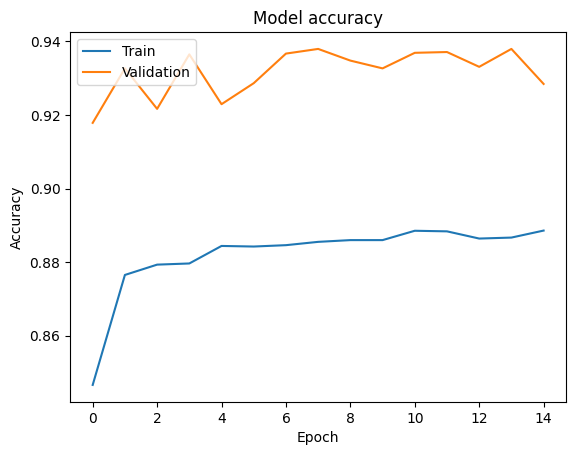

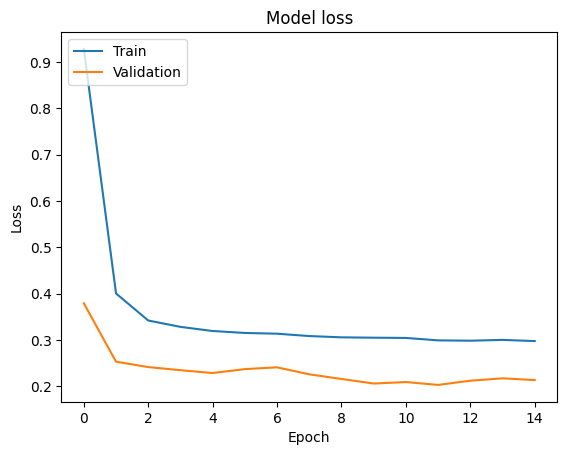

In [ ]:
# prompt: plot above including ROC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, test_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#Hyperparameter SimpleRNN

```
# This is formatted as code
```



In [ ]:
!pip install keras-tuner -q
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score
from keras_tuner import RandomSearch

# Function to create the model
def create_model(hp):
    units = hp.Int('units', min_value=50, max_value=150, step=50)
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.4, step=0.1)
    l2_reg = hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.009)
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units=units, return_sequences=True, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units=units, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Build model using Random Search
tuner = RandomSearch(
    create_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='rnn_tuning'
)

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = create_model(best_hps)

# Train the best model with early stopping
history = best_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

# Convert probabilities to binary outcomes
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, train_predict_binary)
train_precision = precision_score(y_train, train_predict_binary)
train_f1 = f1_score(y_train, train_predict_binary)
train_auc = roc_auc_score(y_train, train_predict)
train_conf_matrix = confusion_matrix(y_train, train_predict_binary)

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, test_predict_binary)
test_precision = precision_score(y_test, test_predict_binary)
test_f1 = f1_score(y_test, test_predict_binary)
test_auc = roc_auc_score(y_test, test_predict)
test_conf_matrix = confusion_matrix(y_test, test_predict_binary)

# Print results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")
print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")
print(f"Train AUC: {train_auc}")
print(f"Test AUC: {test_auc}")
print("Train Confusion Matrix:")
print(train_conf_matrix)
print("Test Confusion Matrix:")
print(test_conf_matrix)



Reloading Tuner from random_search/rnn_tuning/tuner0.json
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8227 - loss: 0.7275 - val_accuracy: 0.9308 - val_loss: 0.4237
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8740 - loss: 0.5035 - val_accuracy: 0.9318 - val_loss: 0.3386
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8748 - loss: 0.4113 - val_accuracy: 0.9312 - val_loss: 0.2645
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8809 - loss: 0.3537 - val_accuracy: 0.9240 - val_loss: 0.2526
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8782 - loss: 0.3333 - val_accuracy: 0.9312 - val_loss: 0.2097
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8863 - loss: 0.3119 - val_accuracy: 0.9329 - val_loss: 0.2153
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8864 - loss: 0.3085 - val_accuracy: 0.9340 - val_loss: 0.2017
Epoch 8/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8900 - loss: 0.2920 - val_accuracy: 0.9234 - v

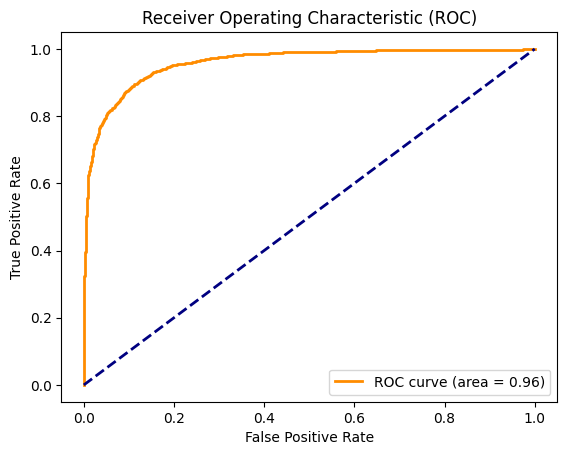

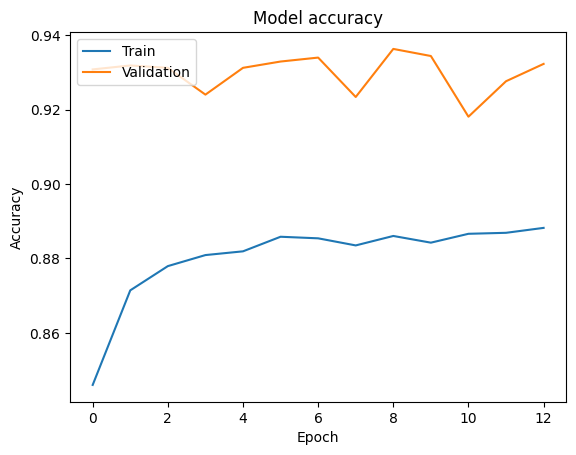

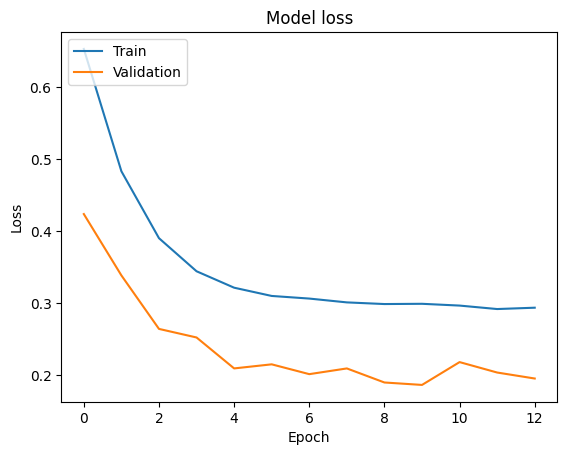

In [ ]:
# prompt: plot above including ROC

import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, test_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#LSTM

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score

# Create the LSTM model with dropout, early stopping, and regularization for binary classification
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Binary crossentropy for binary classification

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Convert probabilities to binary predictions
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Model evaluation (Calculate classification metrics)
train_accuracy = accuracy_score(y_train, train_predict_binary)
test_accuracy = accuracy_score(y_test, test_predict_binary)
train_precision = precision_score(y_train, train_predict_binary)
test_precision = precision_score(y_test, test_predict_binary)
train_f1 = f1_score(y_train, train_predict_binary)
test_f1 = f1_score(y_test, test_predict_binary)
train_auc = roc_auc_score(y_train, train_predict)
test_auc = roc_auc_score(y_test, test_predict)
train_conf_matrix = confusion_matrix(y_train, train_predict_binary)
test_conf_matrix = confusion_matrix(y_test, test_predict_binary)

# Print the results
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print('Train Precision:', train_precision)
print('Test Precision:', test_precision)
print('Train F1 Score:', train_f1)
print('Test F1 Score:', test_f1)
print('Train AUC:', train_auc)
print('Test AUC:', test_auc)
print('Train Confusion Matrix:\n', train_conf_matrix)
print('Test Confusion Matrix:\n', test_conf_matrix)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7895 - loss: 1.0763 - val_accuracy: 0.8817 - val_loss: 0.3253
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8185 - loss: 0.4152 - val_accuracy: 0.8855 - val_loss: 0.3089
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8236 - loss: 0.4022 - val_accuracy: 0.8842 - val_loss: 0.2999
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8405 - loss: 0.3746 - val_accuracy: 0.9098 - val_loss: 0.2563
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8555 - loss: 0.3622 - val_accuracy: 0.9105 - val_loss: 0.2668
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8753 - loss: 0.3398 - val_accuracy: 0.9359 - val_loss: 0.2363
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8806 - loss: 0.3262 - val_accuracy: 0.9145 - val_loss: 0.2574
Epoch 8/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8819 - loss: 0.3228 - val_accuracy: 0.9

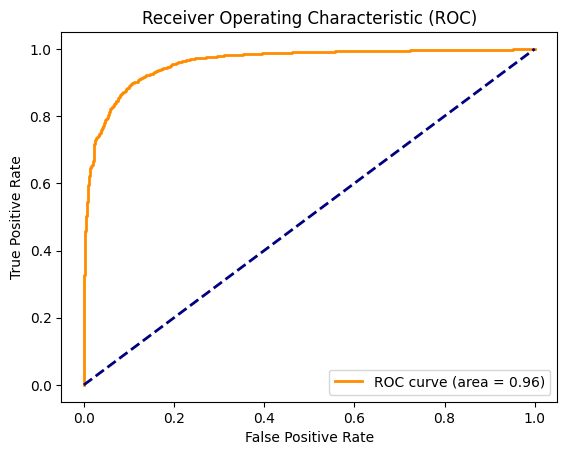

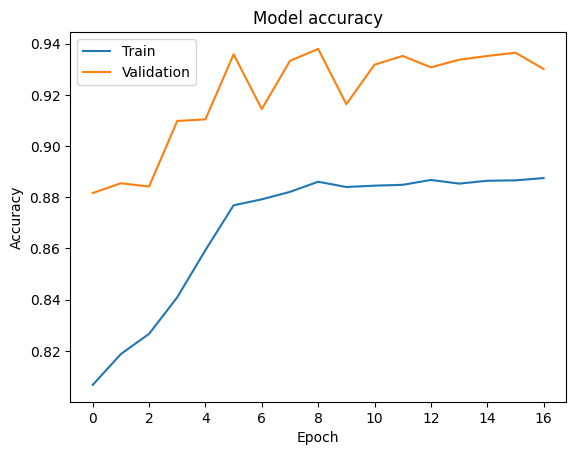

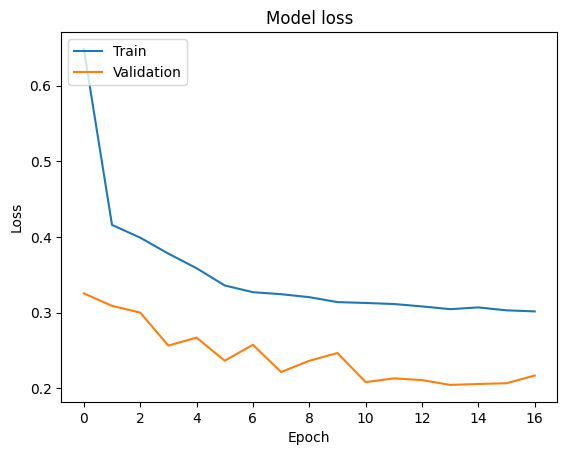

In [ ]:
# prompt: plot above including ROC

import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, test_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#Hyperparameter LSTM

In [ ]:
!pip install keras-tuner -q
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score
from keras_tuner.tuners import RandomSearch

# Function to create the model
def create_model(hp):
    units = hp.Int('units', min_value=50, max_value=150, step=50)
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.4, step=0.1)
    l2_reg = hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.009)
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use binary_crossentropy for binary classification
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Build model using Random Search
tuner = RandomSearch(
    create_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='lstm_tuning_binary'
)

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model with early stopping
history = best_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

# Convert probabilities to binary outcomes
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, train_predict_binary)
train_precision = precision_score(y_train, train_predict_binary)
train_f1 = f1_score(y_train, train_predict_binary)
train_auc = roc_auc_score(y_train, train_predict)
train_conf_matrix = confusion_matrix(y_train, train_predict_binary)

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, test_predict_binary)
test_precision = precision_score(y_test, test_predict_binary)
test_f1 = f1_score(y_test, test_predict_binary)
test_auc = roc_auc_score(y_test, test_predict)
test_conf_matrix = confusion_matrix(y_test, test_predict_binary)

# Print results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")
print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")
print(f"Train AUC: {train_auc}")
print(f"Test AUC: {test_auc}")
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)


Reloading Tuner from random_search/lstm_tuning_binary/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8912 - loss: 0.2711 - val_accuracy: 0.9346 - val_loss: 0.1803
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8918 - loss: 0.2798 - val_accuracy: 0.9342 - val_loss: 0.1816
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8913 - loss: 0.2679 - val_accuracy: 0.9335 - val_loss: 0.1843
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8942 - loss: 0.2727 - val_accuracy: 0.9297 - val_loss: 0.1875
738/738 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Train Accuracy: 0.9029894986449865
Test Accuracy: 0.9039796782387807
Train Precision: 0.9191716766867067
Test Precision: 0.9144223508683614
Train F1 Score: 0.9296440745631545
Test F1 Score: 0.9276139410187667
Train AUC: 0.9656573111199822
Test AUC: 0.9600692957675108
Train Confusion Matrix:
 [[ 6189  1331]
 [  960 15136]]
Test Confusion Matrix:
 [[1705  340]
 [ 227 3633]]


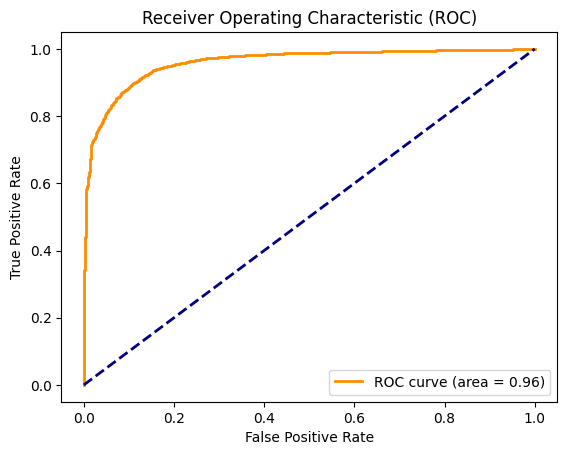

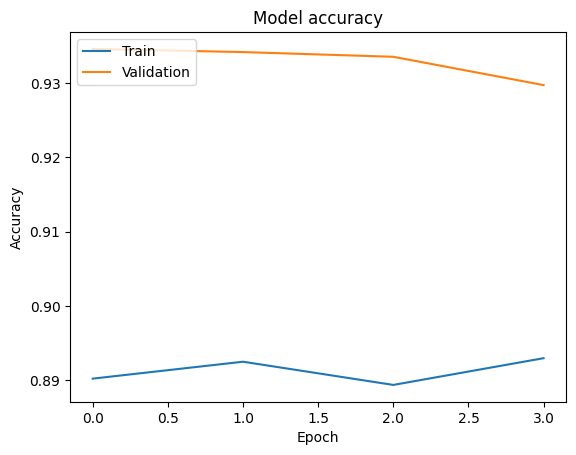

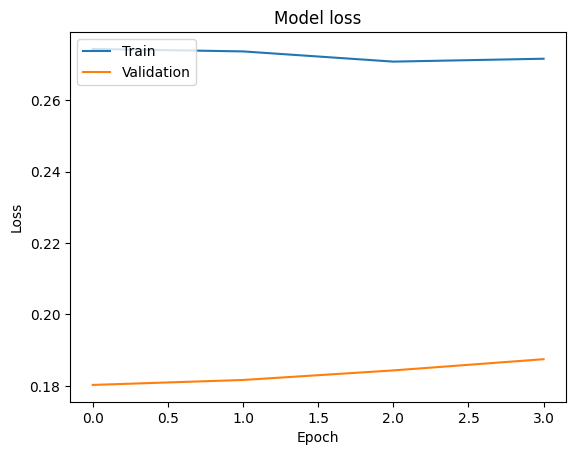

In [ ]:
# prompt: plot above including ROC

import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, test_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#GRU

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score

# Create the GRU model with dropout, early stopping, and regularization
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(GRU(units=50, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Binary classification uses 'binary_crossentropy'

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Convert probabilities to binary outcomes
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, train_predict_binary)
train_precision = precision_score(y_train, train_predict_binary)
train_f1 = f1_score(y_train, train_predict_binary)
train_auc = roc_auc_score(y_train, train_predict)
train_conf_matrix = confusion_matrix(y_train, train_predict_binary)

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, test_predict_binary)
test_precision = precision_score(y_test, test_predict_binary)
test_f1 = f1_score(y_test, test_predict_binary)
test_auc = roc_auc_score(y_test, test_predict)
test_conf_matrix = confusion_matrix(y_test, test_predict_binary)

# Print the results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")
print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")
print(f"Train AUC: {train_auc}")
print(f"Test AUC: {test_auc}")
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8065 - loss: 1.1022 - val_accuracy: 0.9098 - val_loss: 0.2922
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8758 - loss: 0.3473 - val_accuracy: 0.9365 - val_loss: 0.2317
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8818 - loss: 0.3251 - val_accuracy: 0.9337 - val_loss: 0.2256
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8821 - loss: 0.3176 - val_accuracy: 0.9272 - val_loss: 0.2464
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8869 - loss: 0.3101 - val_accuracy: 0.9371 - val_loss: 0.2152
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8882 - loss: 0.3064 - val_accuracy: 0.9376 - val_loss: 0.2209
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8847 - loss: 0.3057 - val_accuracy: 0.9333 - val_loss: 0.2076
Epoch 8/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8944 - loss: 0.2959 - val_accuracy: 0.9373 -

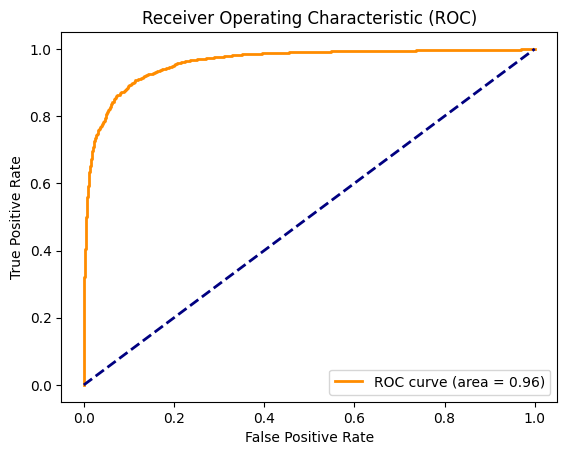

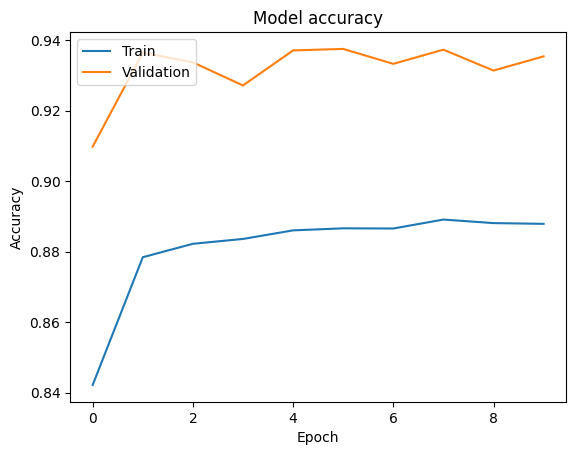

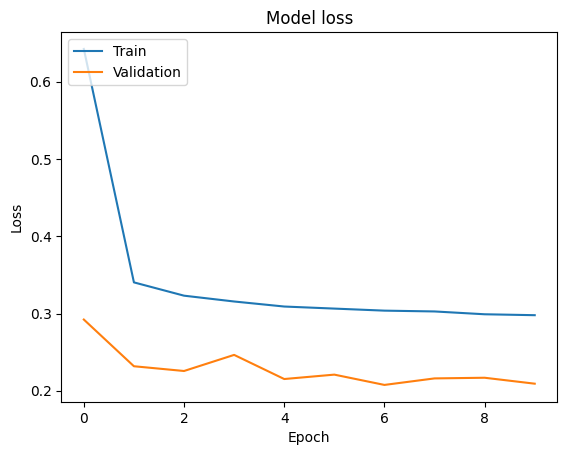

In [ ]:
# prompt: plot above including ROC

import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, test_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#Hyperparameter GRU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score
from keras_tuner import RandomSearch

# Function to create the model for binary classification
def create_model(hp):
    units = hp.Int('units', min_value=50, max_value=200, step=50)
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    l2_reg = hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.01)

    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units, return_sequences=True, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units, kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification uses sigmoid activation

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use binary_crossentropy
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Build model using Random Search
tuner = RandomSearch(
    create_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='gru_tuning_binary'
)

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model with early stopping
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

# Convert probabilities to binary outcomes
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, train_predict_binary)
train_precision = precision_score(y_train, train_predict_binary)
train_f1 = f1_score(y_train, train_predict_binary)
train_auc = roc_auc_score(y_train, train_predict)
train_conf_matrix = confusion_matrix(y_train, train_predict_binary)

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, test_predict_binary)
test_precision = precision_score(y_test, test_predict_binary)
test_f1 = f1_score(y_test, test_predict_binary)
test_auc = roc_auc_score(y_test, test_predict)
test_conf_matrix = confusion_matrix(y_test, test_predict_binary)

# Print results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")
print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")
print(f"Train AUC: {train_auc}")
print(f"Test AUC: {test_auc}")
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)


Reloading Tuner from random_search/gru_tuning_binary/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8788 - loss: 0.3443 - val_accuracy: 0.9335 - val_loss: 0.3102
Epoch 2/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8812 - loss: 0.3417 - val_accuracy: 0.9337 - val_loss: 0.2828
Epoch 3/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8796 - loss: 0.3413 - val_accuracy: 0.9293 - val_loss: 0.2465
Epoch 4/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8826 - loss: 0.3350 - val_accuracy: 0.9359 - val_loss: 0.2530
Epoch 5/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8795 - loss: 0.3426 - val_accuracy: 0.9293 - val_loss: 0.2603
Epoch 6/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8755 - loss: 0.3415 - val_accuracy: 0.9249 - val_loss: 0.2491
Epoch 7/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8828 - loss: 0.3323 - val_accuracy: 0.9361 - val_loss: 0.2520
Epoch 8/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8852 - loss: 0.3309 - val_accuracy

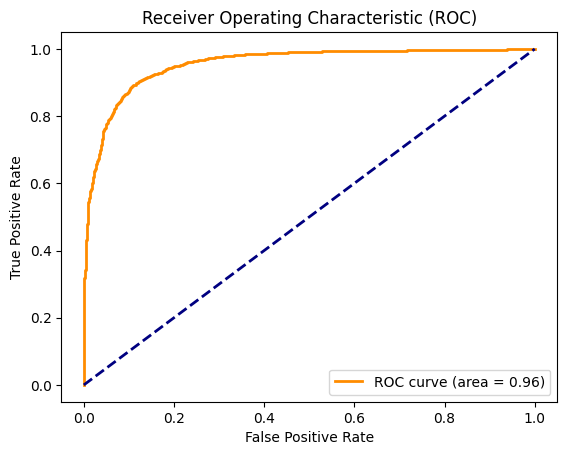

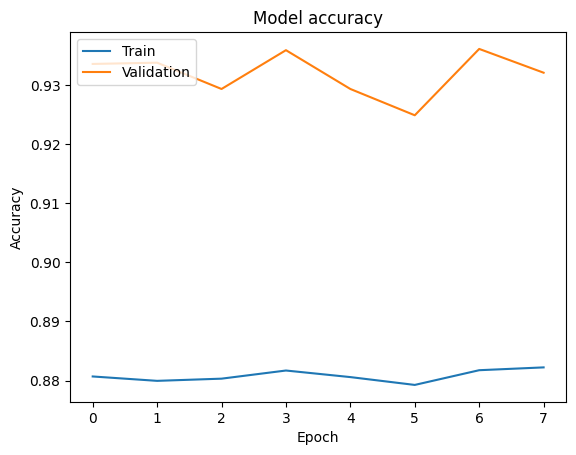

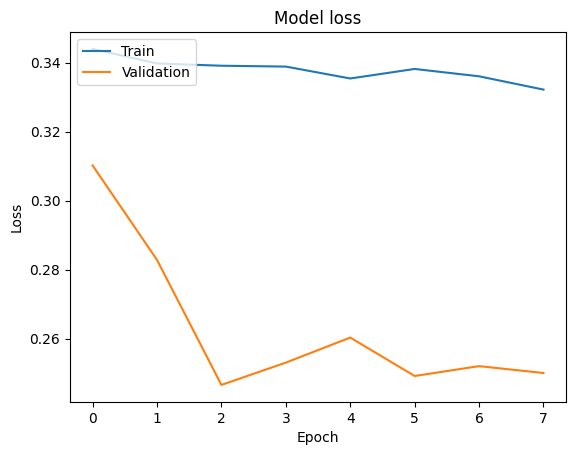

In [ ]:
# prompt: plot above including ROC

import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, test_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
